# RMCO Graph

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as seabornInstance 
from sklearn import metrics

In [2]:
df = pd.read_csv(r'C19 RMCO.csv')
df = df.dropna()

In [3]:
print(df)

    day      date  new_cases_malaysia  total_cases_malaysia  \
0   139  10-06-20                   2                  8338   
1   140  11-06-20                  31                  8369   
2   141  12-06-20                  33                  8402   
3   142  13-06-20                  43                  8445   
4   143  14-06-20                   8                  8453   
5   144  15-06-20                  41                  8494   
6   145  16-06-20                  11                  8505   
7   146  17-06-20                  10                  8515   
8   147  18-06-20                  14                  8529   
9   148  19-06-20                   6                  8535   
10  149  20-06-20                  21                  8556   
11  150  21-06-20                  16                  8572   
12  151  22-06-20                  15                  8587   
13  152  23-06-20                   3                  8590   
14  153  24-06-20                   6                  

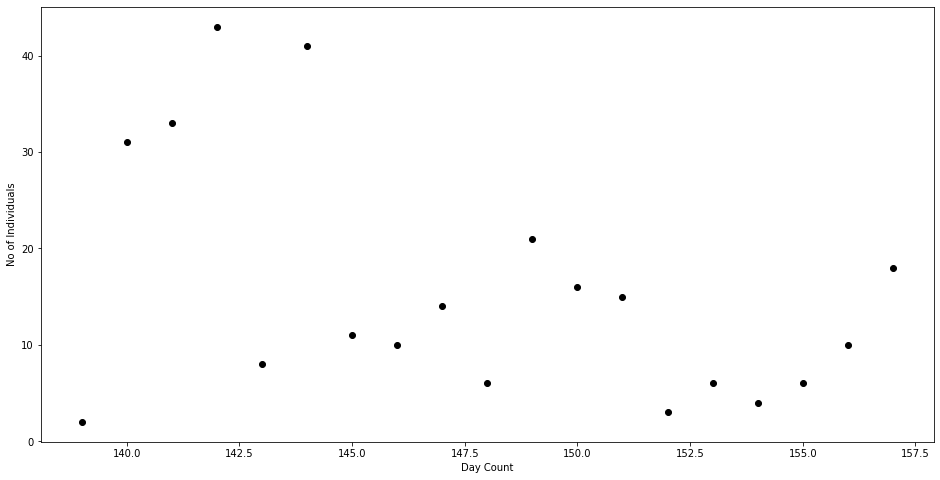

In [4]:
plt.figure(figsize=(16,8))
plt.scatter(
    df['day'],
    df['new_cases_malaysia'],
    c='black'
)

plt.xlabel("Day Count")
plt.ylabel("No of Individuals")
plt.show()

In [5]:

X = df['day'].values.reshape(-1,1)
Y = df['new_cases_malaysia'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,Y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 165.76 + -1.014X


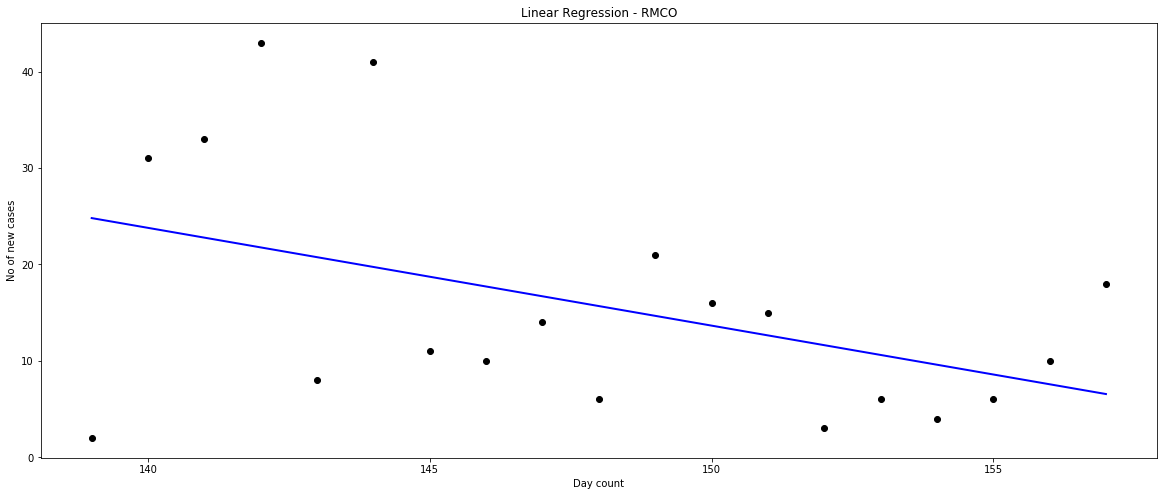

In [13]:
predictions = reg.predict(X)
plt.figure(figsize=(20,8))
plt.scatter(
    df['day'],
    df['new_cases_malaysia'],
    c='black'
)

plt.plot(
    df['day'],
    predictions,
    c='blue',
    linewidth = 2
)

plt.xticks(np.arange(min(df['day']+1), max(df['day']), 5.0))
plt.xlabel("Day count")
plt.ylabel("No of new cases")
plt.title('Linear Regression - RMCO')
plt.show()

In [15]:
X = df['day']
Y = df['new_cases_malaysia']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print("================================ RMCO Results ================================")
print(est2.summary())

================================ RMCO Results ================================
                            OLS Regression Results                            
Dep. Variable:     new_cases_malaysia   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     4.362
Date:                Wed, 01 Jul 2020   Prob (F-statistic):             0.0521
Time:                        21:24:50   Log-Likelihood:                -72.458
No. Observations:                  19   AIC:                             148.9
Df Residuals:                      17   BIC:                             150.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------